In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn import metrics

In [2]:
df_1= pd.read_csv(r"c:\Users\User\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_2= pd.read_csv(r"c:\Users\User\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_3= pd.read_csv(r"c:\Users\User\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_4= pd.read_csv(r"c:\Users\User\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_5= pd.read_csv(r"c:\Users\User\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([df_1 , df_2 , df_3, df_4, df_5],axis=0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
177088,2024-04,YISHUN,5 ROOM,512C,YISHUN ST 51,07 TO 09,113.0,Improved,2017,718000.0,92 years 05 months
177089,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62 years 01 month
177090,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67 years 03 months
177091,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63 years 04 months


In [3]:
df.shape

(923296, 11)

In [4]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923296 entries, 0 to 177092
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                923296 non-null  object 
 1   town                 923296 non-null  object 
 2   flat_type            923296 non-null  object 
 3   block                923296 non-null  object 
 4   street_name          923296 non-null  object 
 5   storey_range         923296 non-null  object 
 6   floor_area_sqm       923296 non-null  float64
 7   flat_model           923296 non-null  object 
 8   lease_commence_date  923296 non-null  int64  
 9   resale_price         923296 non-null  float64
 10  remaining_lease      214246 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.5+ MB


In [6]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [7]:
df.shape

(923296, 11)

In [8]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [9]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [10]:
#replacing MULTI-GENERATION with MULTI GENERATION
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [11]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [12]:
df['block'].unique()

array(['309', '216', '211', ..., '606C', '605D', '460B'], dtype=object)

In [13]:
df['block'] = df['block'].astype(str)
df['block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))

In [14]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [15]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [16]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [17]:
#splitting month column to year and month
df['reg_year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df['reg_month'] = df['month'].apply(lambda x: int(x.split('-')[1]))

In [18]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [19]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


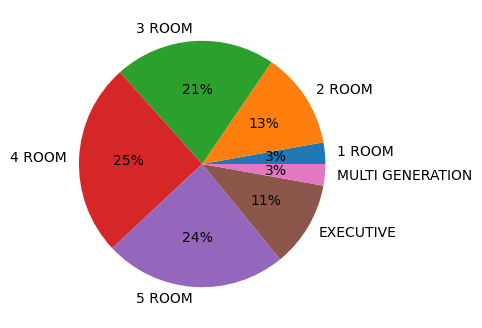

In [20]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

<Axes: title={'center': 'floor area distribution of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

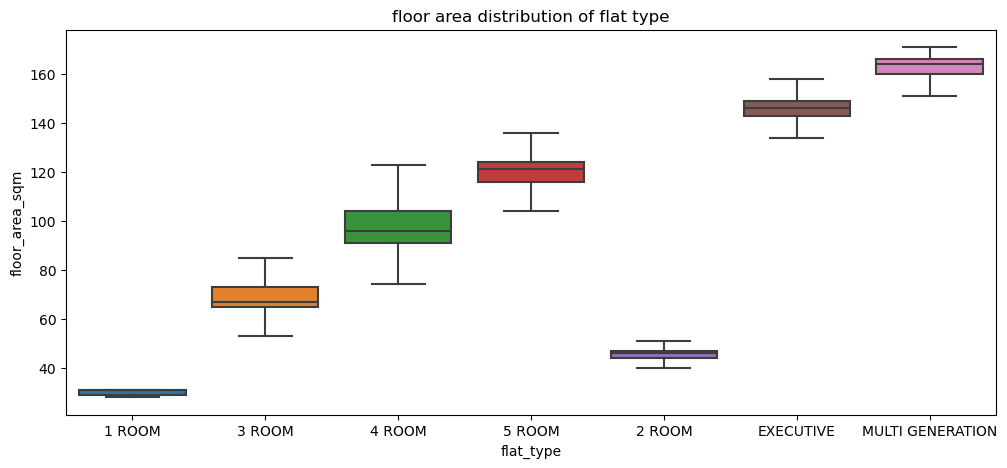

In [21]:
import seaborn as sns


plt.figure(figsize = (12,5))
plt.title('floor area distribution of flat type')
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

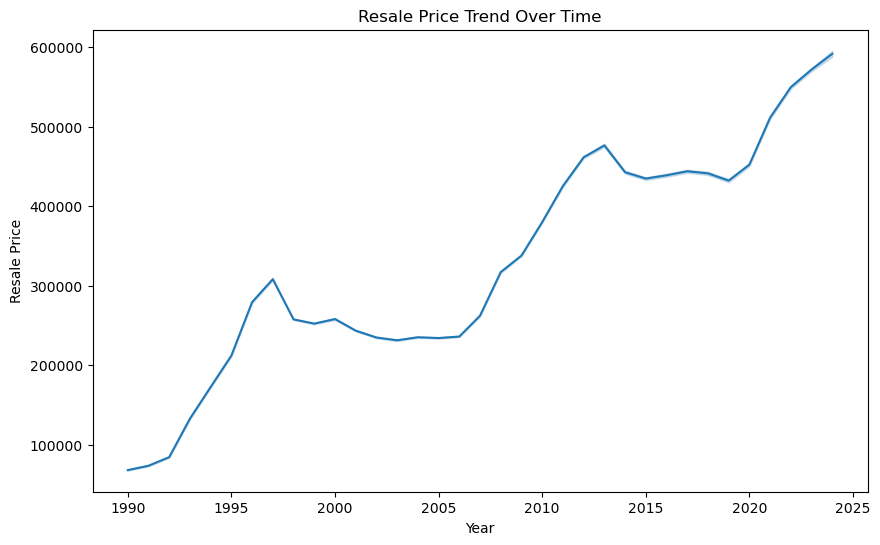

In [22]:
df['lease_commence_date'] = df['lease_commence_date']

plt.figure(figsize=(10, 6))
sns.lineplot(x='reg_year', y='resale_price', data=df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [23]:
# Use LabelEncoder to convert 'street_name','flat_model' ,'flat_type' ,'town' to numeric
le1 = LabelEncoder()
df['street_name'] = le1.fit_transform(df['street_name'])
le2 = LabelEncoder()
df['flat_type'] = le2.fit_transform(df['flat_type'])
le3 = LabelEncoder()
df['flat_model'] = le3.fit_transform(df['flat_model'])
le4 = LabelEncoder()
df['town'] = le4.fit_transform(df['town'])
le5 = LabelEncoder()
df['storey_range'] = le5.fit_transform(df['storey_range'])

In [24]:
df.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,1990-01,0,0,309,13,5,31.0,7,1977,9000.0,NaN,1990,1


In [25]:
df.drop("remaining_lease",inplace = True , axis = 1)

In [26]:
df['street_name'].unique()

array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
        39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
       116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
       448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
       178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
       175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
        30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
       152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
       163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
       216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
       227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
       514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501,
       247, 290,   2, 300, 162, 324, 325, 327, 100, 102, 481, 101, 170,
       323, 194, 169, 442, 334, 203, 202, 204, 168, 398, 319, 42

<Axes: title={'center': 'Correlation Matrix'}>

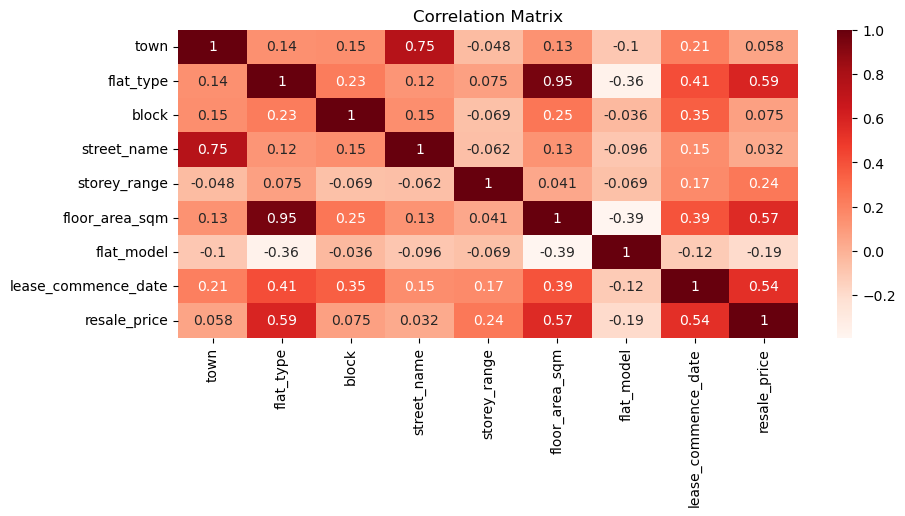

In [27]:
feature_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range','floor_area_sqm', 'flat_model', 'lease_commence_date',
                 'resale_price']
plt.figure(figsize = (10,4))
plt.title('Correlation Matrix')
sns.heatmap(df[feature_cols].corr(),cmap="Reds", annot = True)

In [28]:
# data splitting into features and target
X = df[['town','flat_type','block','street_name','storey_range','flat_model','floor_area_sqm','lease_commence_date','reg_year','reg_month']]
y = df['resale_price']

### Model Selection and Training

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,town,flat_type,block,street_name,storey_range,flat_model,floor_area_sqm,lease_commence_date,reg_year,reg_month
138412,3,4,419,81,4,7,130.0,1986,1996,10
138160,1,2,3,47,2,9,59.0,1976,2004,1
266617,21,4,298,159,8,23,121.0,2001,2008,7
119741,11,2,242,218,0,21,72.0,1984,2022,2
163083,11,3,220,217,5,16,105.0,1992,2004,11
...,...,...,...,...,...,...,...,...,...,...
259178,11,2,328,210,5,20,67.0,1983,1999,6
78642,25,4,214,330,13,9,118.0,1981,2002,2
131932,1,2,537,42,2,20,83.0,1980,1996,8
14308,21,3,275,157,0,23,90.0,2009,2012,9


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(X_train , y_train)
y_pred = linear_regression.predict(X_test)

print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'Accuracy score = {linear_regression.score(X_test,y_test)}')

MAE = 60242.71794752589
MSE = 6546445044.511229
RMSE  = 80910.10471202734
Accuracy score = 0.772571545837191


In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

print(f'MAE - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score - {dt_regressor.score(X_test, y_test)}')

MAE - 19399.11528356877
MSE - 877832792.6249753
RMSE - 29628.243157922396
Accuracy Score - 0.9695034245788852


<Axes: xlabel='resale_price'>

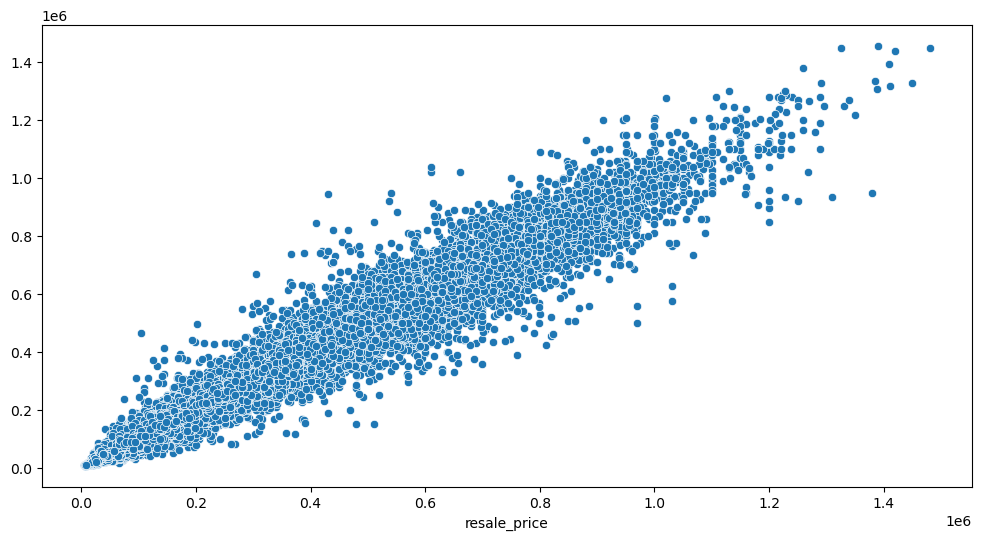

In [32]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

print(f'MAE - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score - {rf_regressor.score(X_test, y_test)}')

MAE - 32713.15741789329
MSE - 2286591344.3578153
RMSE - 47818.31599249199
Accuracy Score - 0.9205620865655363


### Saving the model

In [34]:
import pickle

In [35]:
with open ('dt.pkl', 'wb') as f:
    pickle.dump(dt_regressor, f)

In [36]:
month = 7
town = 26
flat_type= 4
block= 512
street_name= 561
storey_range = 5.0
floor_area_sqm = 122.0
flat_model= 9
lease_commence_date = 1988
year = 2014

In [44]:
dt_regressor.predict(np.array([[5,85,4,520,561,8,122,9,1988,2015]]))

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([115000.])

In [47]:
df['flat_type'].max()
df['flat_type'].min()

0